In [25]:
import spectral.io.envi as envi
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
HSI_data = envi.open('data/f080611t01p00r07rdn_c_sc01_ort_img.hdr',
                     'data/f080611t01p00r07rdn_c_sc01_ort_img')

In [3]:
HSI_data

	Data Source:   '.\data/f080611t01p00r07rdn_c_sc01_ort_img'
	# Rows:           1924
	# Samples:         753
	# Bands:           224
	Interleave:        BIP
	Quantization:  16 bits
	Data format:     int16

In [4]:
HSI_data.metadata

{'description': 'AVIRIS orthocorrected file, pixel size =       17.0000\nrotation angle =      -19.0000\ndatum = WGS-84\nUTM zone =           10\nupper left corner (1,1) (Easting) =        570484.93\nupper left corner (1,1) (Northing) =        4159114.7',
 'samples': '753',
 'lines': '1924',
 'bands': '224',
 'header offset': '0',
 'data type': '2',
 'interleave': 'bip',
 'byte order': '1',
 'map info': ['UTM',
  '1',
  '1',
  '570484.930',
  '4159114.700',
  '17.000',
  '17.000',
  '10',
  'North',
  'WGS-84',
  'units=Meters',
  'rotation=19.0000'],
 'x start': '1',
 'y start': '1',
 'wavelength': ['365.9298',
  '375.5940',
  '385.2625',
  '394.9355',
  '404.6129',
  '414.2946',
  '423.9808',
  '433.6713',
  '443.3662',
  '453.0655',
  '462.7692',
  '472.4773',
  '482.1898',
  '491.9066',
  '501.6279',
  '511.3535',
  '521.0836',
  '530.8180',
  '540.5568',
  '550.3000',
  '560.0477',
  '569.7996',
  '579.5560',
  '589.3168',
  '599.0819',
  '608.8515',
  '618.6254',
  '628.4037',
  

In [5]:
HSI_data[:, :, :]

array([[[1221, 1352, 1400, ...,   23,    7,    9],
        [1220, 1388, 1415, ...,   19,    6,    7],
        [1202, 1361, 1380, ...,   18,    4,    7],
        ...,
        [ -50,  -50,  -50, ...,  -50,  -50,  -50],
        [ -50,  -50,  -50, ...,  -50,  -50,  -50],
        [ -50,  -50,  -50, ...,  -50,  -50,  -50]],

       [[1209, 1363, 1410, ...,   18,    7,    7],
        [1220, 1397, 1427, ...,   20,    8,   11],
        [1245, 1378, 1419, ...,   15,    7,    6],
        ...,
        [ -50,  -50,  -50, ...,  -50,  -50,  -50],
        [ -50,  -50,  -50, ...,  -50,  -50,  -50],
        [ -50,  -50,  -50, ...,  -50,  -50,  -50]],

       [[1221, 1352, 1400, ...,   21,    9,   10],
        [ -50,  -50,  -50, ...,  -50,  -50,  -50],
        [1247, 1350, 1385, ...,   17,    5,    8],
        ...,
        [ -50,  -50,  -50, ...,  -50,  -50,  -50],
        [ -50,  -50,  -50, ...,  -50,  -50,  -50],
        [ -50,  -50,  -50, ...,  -50,  -50,  -50]],

       ...,

       [[ -50,  -50,  -5

In [8]:
prm = 'reflectance scale factor'
HSImage = HSI_data[:, :, :] * float(HSI_data.metadata.get(prm))
HSImage

KeyboardInterrupt: 

In [9]:
import numpy as np
HSImage = np.array(HSI_data.open_memmap(), dtype=int)
h, w, b = HSImage.shape

print(f'Размер ГСИ: {h}x{w}x{b}')
HSImage

Размер ГСИ: 1924x753x224


array([[[1221, 1352, 1400, ...,   23,    7,    9],
        [1220, 1388, 1415, ...,   19,    6,    7],
        [1202, 1361, 1380, ...,   18,    4,    7],
        ...,
        [ -50,  -50,  -50, ...,  -50,  -50,  -50],
        [ -50,  -50,  -50, ...,  -50,  -50,  -50],
        [ -50,  -50,  -50, ...,  -50,  -50,  -50]],

       [[1209, 1363, 1410, ...,   18,    7,    7],
        [1220, 1397, 1427, ...,   20,    8,   11],
        [1245, 1378, 1419, ...,   15,    7,    6],
        ...,
        [ -50,  -50,  -50, ...,  -50,  -50,  -50],
        [ -50,  -50,  -50, ...,  -50,  -50,  -50],
        [ -50,  -50,  -50, ...,  -50,  -50,  -50]],

       [[1221, 1352, 1400, ...,   21,    9,   10],
        [ -50,  -50,  -50, ...,  -50,  -50,  -50],
        [1247, 1350, 1385, ...,   17,    5,    8],
        ...,
        [ -50,  -50,  -50, ...,  -50,  -50,  -50],
        [ -50,  -50,  -50, ...,  -50,  -50,  -50],
        [ -50,  -50,  -50, ...,  -50,  -50,  -50]],

       ...,

       [[ -50,  -50,  -5

In [10]:
default_bands = [int(db) for db in default_bands]
wavelength = HSI_data.metadata.get('wavelength')

for db in default_bands:
    print(f'Номер канала {db}, длина волны: {wavelength[db]}нм')

TypeError: 'int' object is not iterable

In [11]:
def get_rayleigh_scattering(hsi: np.array) -> np.zeros:
    rayleigh_sig = np.zeros(shape=b, dtype=hsi.dtype)

    for i in range(b):
        layer = hsi[..., i]
        rayleigh_sig[i] = layer[layer > 0].min()

    return rayleigh_sig

In [23]:
def maximum_filter(layer, sigma):
    mean_value = layer.mean()
    std_value = layer.std()
    threshold = mean_value + (sigma * std_value)

    layer[layer > threshold] = threshold

    return layer

def hsi_to_rgb(hsi, bands) -> np.uint8:
    rgb_image_size = (h, w, 3)
    rgb_image = np.zeros(shape=rgb_image_size, dtype=float)

    for i, b_ in enumerate(bands):
        try:
            layer = np.mean((hsi[..., b - 1], hsi[..., b], hsi[..., b + 1]), axis=0)
            layer[layer < 0] = 0
            layer = maximum_filter(layer, 3)

            min_value = layer.min()
            max_value = layer.max()

            layer = (layer - min_value) / (max_value - min_value)
            rgb_image[..., i] = layer
        except IndexError:
            break

    return np.uint8(rgb_image * 255)

In [14]:
def show(image, title="", cmap=None):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

In [15]:
rayleigh_scattering = get_rayleigh_scattering(HSImage)
HSImage -= rayleigh_scattering
HSImage[HSImage < 0] = 0

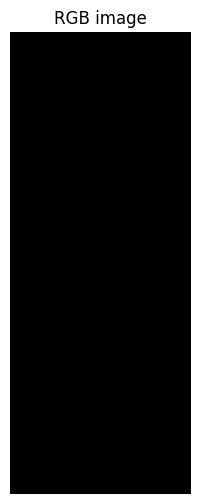

In [26]:
rgb_image = hsi_to_rgb(HSImage, (29, 16, 8))

show(rgb_image, "RGB image")